<a href="https://colab.research.google.com/github/SSYT01/Stock-Analysis/blob/main/Sentiment_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment Analysis with Financial News Headlines


In [1]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [47]:
news_tables = {}
tickers = ['MRNA','MRK','PFE','BNTX']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table


In [48]:
# Read one single day of headlines for 'MRK' 
MRK = news_tables['MRK']
# Get all the table rows tagged in HTML with <tr> into 'MRK_tr'
MRK_tr = MRK.findAll('tr')

for i, table_row in enumerate(MRK_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

ECU joins clinical trial for Merck's Covid-19 pill
Oct-07-21 05:00AM  
Bragar Eagel & Squire, P.C. Announces that it Is Investigating the Boards of Directors of Home BancShares, Valley National, Kraton Corporation, and Acceleron Pharma on behalf of Stockholders and Encourages Investors to Contact the Firm
Oct-06-21 03:34PM  
Mixing & matching covid boosters might be a great opportunity: Doctor
02:32PM  
Retail Traders Buy Into Mercks Pill, Bail on Vaccine Shots
08:32AM  


In [50]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news


[['MRNA',
  'Oct-07-21',
  '07:59AM',
  'Why AbCellera Biologics Stock Jumped 19.4% Last Month'],
 ['MRNA',
  'Oct-07-21',
  '06:35AM',
  'What Do Mix-and-Match Doses Mean for Vaccine Stocks?'],
 ['MRNA',
  'Oct-07-21',
  '06:02AM',
  '3 Biotech Stocks That Could Make You Richer in October and Beyond'],
 ['MRNA',
  'Oct-07-21',
  '05:51AM',
  '3 Lightning-Quick Growth Stocks Expected to Increase Sales 1,334% to 22,562% in 3 Years'],
 ['MRNA',
  'Oct-07-21',
  '04:11AM',
  'UPDATE 2-Finland joins Sweden and Denmark in limiting Moderna COVID-19 vaccine'],
 ['MRNA',
  'Oct-07-21',
  '03:11AM',
  'Finland pauses use of Moderna COVID-19 vaccine in young men'],
 ['MRNA',
  'Oct-07-21',
  '02:44AM',
  'Moderna to invest $500 million in state-of-the-art mRNA vaccine factory in Africa'],
 ['MRNA',
  'Oct-07-21',
  '02:38AM',
  'UPDATE 3-Moderna plans African vaccine plant as drugmakers urged to help poorest'],
 ['MRNA',
  'Oct-07-21',
  '02:00AM',
  'Moderna to Build State-of-the-Art mRNA Facil

In [51]:
  >>> import nltk
  >>> nltk.download('vader_lexicon')
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,ticker,date,time,headline,neg,neu,pos,compound
0,MRNA,2021-10-07,07:59AM,Why AbCellera Biologics Stock Jumped 19.4% Las...,0.0,1.000,0.000,0.0000
1,MRNA,2021-10-07,06:35AM,What Do Mix-and-Match Doses Mean for Vaccine S...,0.0,1.000,0.000,0.0000
2,MRNA,2021-10-07,06:02AM,3 Biotech Stocks That Could Make You Richer in...,0.0,0.746,0.254,0.5267
3,MRNA,2021-10-07,05:51AM,3 Lightning-Quick Growth Stocks Expected to In...,0.0,0.671,0.329,0.5994
4,MRNA,2021-10-07,04:11AM,UPDATE 2-Finland joins Sweden and Denmark in l...,0.0,1.000,0.000,0.0000


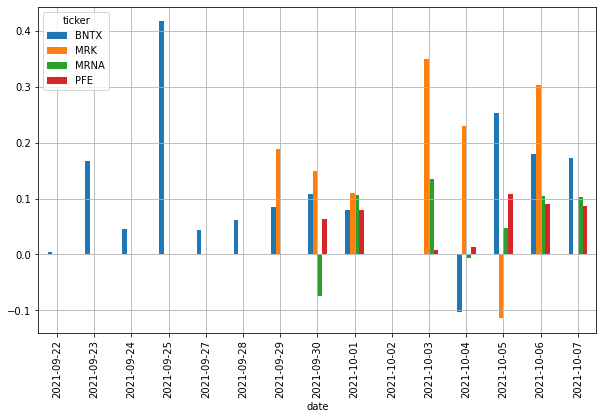

In [52]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()